In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

In [2]:
data=pd.read_csv('zomato.csv')
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [3]:
print("Percentage null or na values in df")
((data.isnull() | data.isna()).sum() * 100 / data.index.size).round(2)

Percentage null or na values in df


url                             0.00
address                         0.00
name                            0.00
online_order                    0.00
book_table                      0.00
rate                           15.03
votes                           0.00
phone                           2.34
location                        0.04
rest_type                       0.44
dish_liked                     54.29
cuisines                        0.09
approx_cost(for two people)     0.67
reviews_list                    0.00
menu_item                       0.00
listed_in(type)                 0.00
listed_in(city)                 0.00
dtype: float64

In [4]:
data.rate = data.rate.replace("NEW", np.nan)
data.dropna(how ='any', inplace = True)

In [5]:
del data['url']
del data['address']
del data['phone']
del data['location']
data.rename(columns={'approx_cost(for two people)': 'average_cost', 'listed_in(city)': 'locality','listed_in(type)': 'restaurant_type'}, inplace=True)
data.head()

,name,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,average_cost,reviews_list,menu_item,restaurant_type,locality
0,Jalsa,Yes,Yes,4.1/5,775,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [6]:
X = data
X.rate = X.rate.astype(str)
X.rate = X.rate.apply(lambda x: x.replace('/5',''))
X.rate = X.rate.apply(lambda x: float(x))
X.head()

,name,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,average_cost,reviews_list,menu_item,restaurant_type,locality
0,Jalsa,Yes,Yes,4.1,775,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


Text(0.5, 1.0, 'locality')

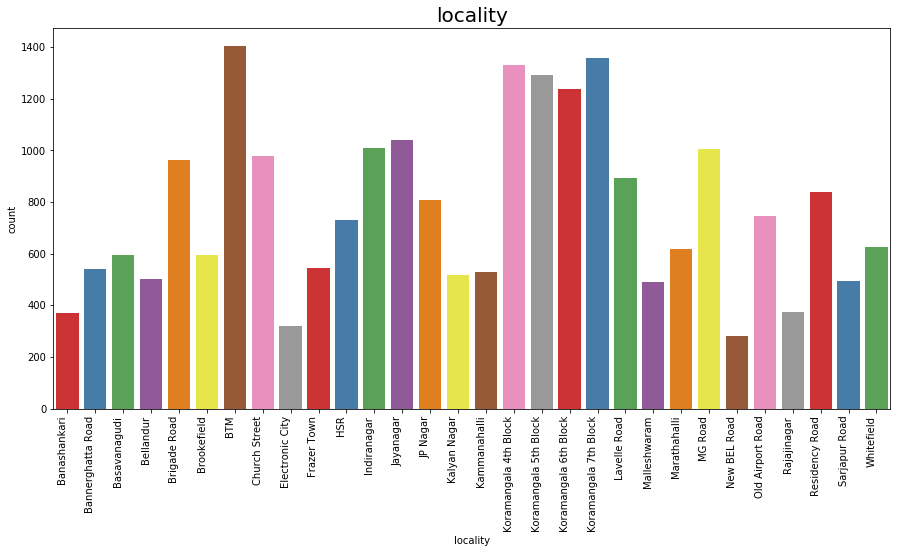

In [7]:
rcParams['figure.figsize'] = 15,7
g = sns.countplot(x="locality",data=data, palette = "Set1")
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
g 
plt.title('locality',size = 20)

Text(0.5, 1.0, 'rest_type')

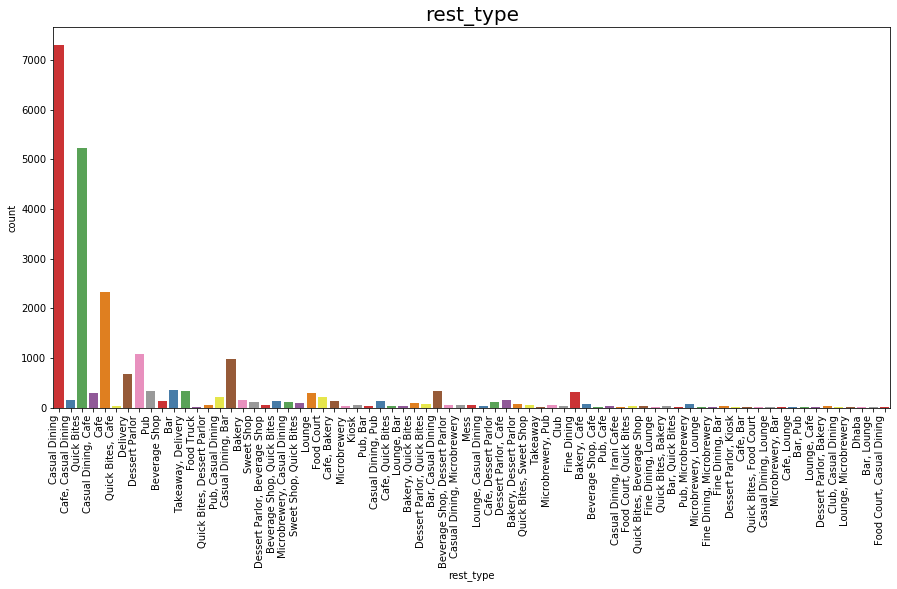

In [8]:
rcParams['figure.figsize'] = 15,7
g = sns.countplot(x="rest_type",data=data, palette = "Set1")
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
g 
plt.title('rest_type',size = 20)

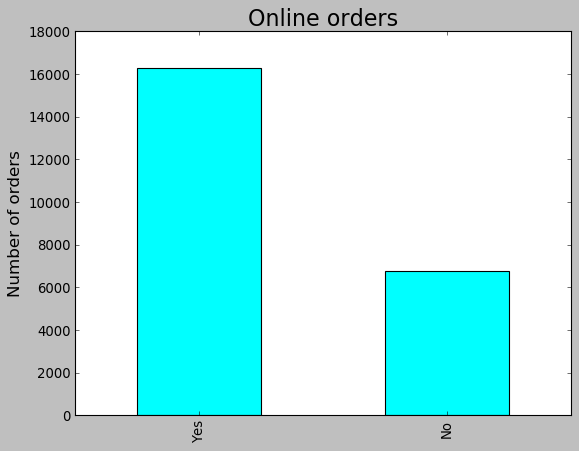

In [9]:
plt.rcParams['figure.figsize'] = (3, 4)
plt.style.use('_classic_test')

X['online_order'].value_counts().plot.bar(color = 'cyan')
plt.title('Online orders', fontsize = 20)
plt.ylabel('Number of orders', fontsize = 15)
plt.show()

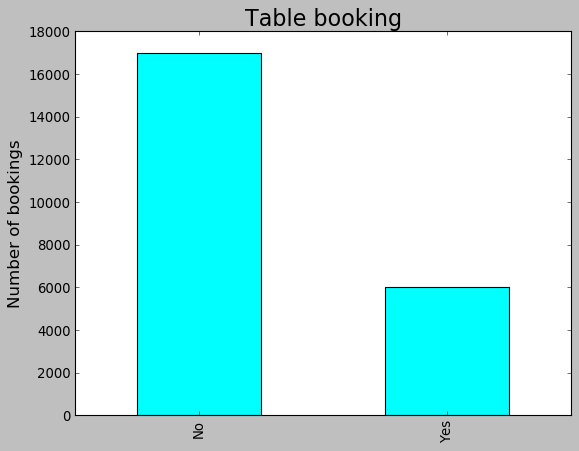

In [10]:
plt.rcParams['figure.figsize'] = (7, 9)
plt.style.use('_classic_test')

X['book_table'].value_counts().plot.bar(color = 'cyan')
plt.title('Table booking', fontsize = 20)
plt.ylabel('Number of bookings', fontsize = 15)
plt.show()


C:\Users\Shree\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


Text(0.5, 1.0, 'Cost Distrubution for all restaurants')

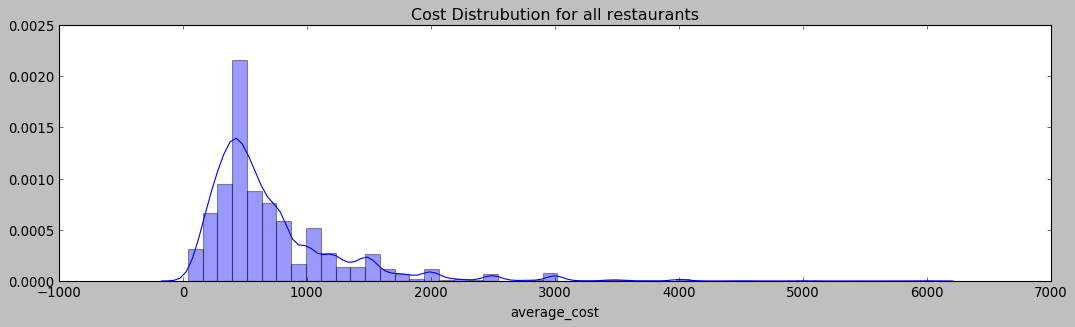

In [13]:
X.head()
X.average_cost = X.average_cost.apply(lambda x: x.replace(',',''))
X.average_cost = X.average_cost.astype(int)
fig, ax = plt.subplots(figsize=[16,4])
sns.distplot(X['average_cost'],ax=ax)
ax.set_title('Cost Distrubution for all restaurants')

In [14]:
X= X.drop_duplicates(subset='name',keep='first')
# dups_name = X1.pivot_table(index=['name'],aggfunc='size')
newdf=X[['name','average_cost','locality','rest_type','cuisines']].groupby(['average_cost'], sort = True)
newdf=newdf.filter(lambda x: x.mean() <= 1500)
newdf=newdf.sort_values(by=['average_cost'])

newdf_expensive=X[['name','average_cost','locality','rest_type','cuisines']].groupby(['average_cost'], sort = True)
newdf_expensive=newdf_expensive.filter(lambda x: x.mean() >= 3000)
newdf_expensive=newdf_expensive.sort_values(by=['average_cost'])
# newdf

In [15]:
newdf_rate=X[['name','rate']].groupby(['rate'], sort = True)
newdf_rate=newdf_rate.filter(lambda x: x.mean() >= 4.5)
newdf_rate=newdf_rate.sort_values(by=['rate'])
X.rate.value_counts()
X.rate.unique()
X.nunique()
# newdf_rate


name               3142
online_order          2
book_table            2
rate                 31
votes               965
rest_type            70
dish_liked         2903
cuisines           1475
average_cost         56
reviews_list       3107
menu_item           692
restaurant_type       7
locality             30
dtype: int64

In [16]:
s1 = pd.merge(newdf, newdf_rate, how='inner', on=['name'])

s2= pd.merge(newdf_expensive, newdf_rate, how='inner', on=['name'])

print("Cheap restaurants with low cost,high rating \n")
s1


Cheap restaurants with low cost,high rating 



,name,average_cost,locality,rest_type,cuisines,rate
0,Brahmin's Coffee Bar,100,Basavanagudi,Quick Bites,South Indian,4.8
1,Taaza Thindi,100,Banashankari,Quick Bites,South Indian,4.7
2,CTR,150,Malleshwaram,Quick Bites,South Indian,4.7
3,Chikkanna Tiffin Room,150,Brigade Road,Quick Bites,South Indian,4.5
4,Veena Stores,150,Malleshwaram,Quick Bites,South Indian,4.5
...,...,...,...,...,...,...
86,Opus Food Stories,1500,Bellandur,"Bar, Casual Dining","Goan, Asian, North Indian, European, Continental",4.7
87,Chianti,1500,Brigade Road,Casual Dining,Italian,4.5
88,Sarjapur Social,1500,Bellandur,"Bar, Casual Dining","American, North Indian, Chinese, Finger Food",4.6
89,Toast & Tonic,1500,Brigade Road,Casual Dining,"European, Asian",4.6


In [17]:
print("Expensive restaurants with high cost,high rating \n")
s2


Expensive restaurants with high cost,high rating 



,name,average_cost,locality,rest_type,cuisines,rate
0,Rim Naam - The Oberoi,3000,Brigade Road,Fine Dining,Thai,4.6
1,Karavalli - The Gateway Hotel,3500,Brigade Road,Fine Dining,"Mangalorean, Konkan, Seafood, Kerala",4.5
2,Alba - JW Marriott Bengaluru,4000,Brigade Road,Fine Dining,Italian,4.5


In [18]:
newdf_votes=X[['name','votes']].groupby(['votes'], sort = True)
newdf_votes=newdf_votes.filter(lambda x: x.mean() >= 175)
newdf_votes=newdf_votes.sort_values(by=['votes'])

In [19]:
s = pd.merge(s1, newdf_votes, how='inner', on=['name'])
s=s.sort_values(by=['average_cost'])
print("Cheap restaurants,high rating,high votes")
s

Cheap restaurants,high rating,high votes


,name,average_cost,locality,rest_type,cuisines,rate,votes
0,Brahmin's Coffee Bar,100,Basavanagudi,Quick Bites,South Indian,4.8,2679
1,Taaza Thindi,100,Banashankari,Quick Bites,South Indian,4.7,651
2,CTR,150,Malleshwaram,Quick Bites,South Indian,4.7,4408
3,Chikkanna Tiffin Room,150,Brigade Road,Quick Bites,South Indian,4.5,203
4,Veena Stores,150,Malleshwaram,Quick Bites,South Indian,4.5,2407
...,...,...,...,...,...,...,...
68,Toit,1500,Indiranagar,Microbrewery,"Italian, American, Pizza",4.7,14956
67,Levitate Brewery and Kitchen,1500,Jayanagar,"Microbrewery, Casual Dining","Finger Food, North Indian, Continental",4.5,456
80,Toast & Tonic,1500,Brigade Road,Casual Dining,"European, Asian",4.6,1082
72,Asia Kitchen By Mainland China,1500,BTM,"Casual Dining, Bar","Asian, Chinese, Thai, Momos",4.9,2178


In [20]:
s = pd.merge(s2, newdf_votes, how='inner', on=['name'])
s=s.sort_values(by=['average_cost'])
s

,name,average_cost,locality,rest_type,cuisines,rate,votes
0,Rim Naam - The Oberoi,3000,Brigade Road,Fine Dining,Thai,4.6,979
1,Karavalli - The Gateway Hotel,3500,Brigade Road,Fine Dining,"Mangalorean, Konkan, Seafood, Kerala",4.5,674
2,Alba - JW Marriott Bengaluru,4000,Brigade Road,Fine Dining,Italian,4.5,583


# No surprises there!!

The Oberoi Hotel, Karavalli and JW Marriott make this high profile list

Interestingly, all these restaurants have the same location- Brigade Road and same restaurant type- Fine dining